In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
CPUMEAN = 0
WALLCLOCKMEAN = 1

cputimes = []
wallclocktimes = []
cpumeans = []
wallclockmeans = []
testNumber = 30
everything = {}
tests={}
percoremax = {}
availabletests = {"decentralized":["get_channel_history", "latency", "send_message", "send_message-short", "send_message-mini"], 
                  "centralized":["get_channel_history", "send_message"]}

In [5]:
for coremax in [4,64]:
    for centralized in ["centralized", "decentralized"]:
        for test in availabletests[centralized]:
            for core in range(1, coremax+1):
                filename = "results/"+str(coremax) + "/" + centralized + "/output-" + test + "-" + str(core) + ".txt"
                with open(filename) as f:
                    for i in range(testNumber):
                        f.readline()
                        line = f.readline().strip().split(" = ")
                        cputimes.append(float(line[-1][:-3]))
                        wallclocktimes.append(float(f.readline().strip().split(" = ")[-1][:-3]))
                        f.readline()
                cpumeans.append(np.mean(cputimes))
                wallclockmeans.append(np.mean(wallclocktimes))
                cputimes = []
                wallclocktimes = []
            tests[test] = [cpumeans, wallclockmeans]
            cpumeans = []
            wallclockmeans = []
        percoremax[centralized] = tests
        tests = {}
    everything[coremax] = percoremax
    percoremax = {}

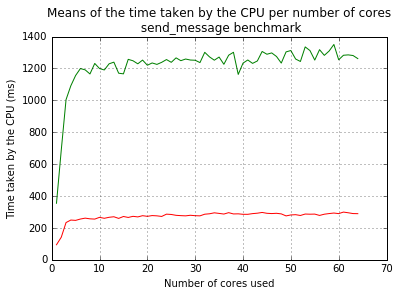

In [8]:
decsend64 = everything[64]["decentralized"]["send_message"][CPUMEAN]
centsend64 = everything[64]["centralized"]["send_message"][CPUMEAN]
line_up, = plt.plot([i+1 for i in range(64)],decsend64,'r-')
line_down, = plt.plot([i+1 for i in range(64)],centsend64,'g-')
# plt.axis([1,64,0,500])
font = {'family' : 'normal',
        'size'   : 12}
plt.title("Means of the time taken by the CPU per number of cores\n send_message benchmark",font)
plt.grid(True)
plt.xlabel('Number of cores used')
plt.ylabel('Time taken by the CPU (ms)')
plt.show()